In [151]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
# import ml_metrics

import seaborn as sn
import matplotlib.pyplot as plt
import pickle

In [152]:
df_results = pd.read_csv('result_Rinfo.csv')
df_results = df_results[['Respondent ID', 'Exitable Calm', 'Uncomfortable Comfortable', 'Pleasant Unpleasant', 'Contemporary Uncontemporary', 'Organized Unorganized', 'Rational Emotional', 'Youthful Mature', 'Formal Informal', 'Orthodox Liberal', 'Complex Simple', 'Colorful Colorless', 'Modest Vain']] = df_results[['Respondent ID', 'Exitable Calm', 'Uncomfortable Comfortable', 'Pleasant Unpleasant', 'Contemporary Uncontemporary', 'Organized Unorganized', 'Rational Emotional', 'Youthful Mature', 'Formal Informal', 'Orthodox Liberal', 'Complex Simple', 'Colorful Colorless', 'Modest Vain']]
df = df_results.set_index('Respondent ID')
df.index.name = None

df.head(5)

,Exitable Calm,Uncomfortable Comfortable,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13264663777,2.0,3.0,1.0,5.0,2.0,4.0,5.0,3.0,2.0,4.0,4.0,2.0
13263750995,2.0,5.0,1.0,0.0,6.0,2.0,2.0,6.0,6.0,3.0,1.0,5.0
13263613156,5.0,6.0,1.0,7.0,0.0,6.0,3.0,5.0,0.0,6.0,1.0,0.0
13249068738,4.0,2.0,2.0,2.0,3.0,6.0,5.0,4.0,5.0,4.0,5.0,3.0
13244840492,2.0,7.0,1.0,2.0,2.0,3.0,3.0,5.0,4.0,2.0,6.0,3.0


In [153]:
respondenten = df.index

In [154]:
# Normalizing the data
from sklearn.preprocessing import MaxAbsScaler

def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in df.columns:
    df[col] = absolute_maximum_scale(df[col])

scaler = MaxAbsScaler()
scaler.fit(df)
scaled = scaler.transform(df)

df = pd.DataFrame(scaled, columns=df.columns, index = respondenten)

df.head(5)

,Exitable Calm,Uncomfortable Comfortable,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13264663777,0.333333,0.428571,0.142857,0.714286,0.285714,0.571429,0.714286,0.428571,0.285714,0.571429,0.571429,0.333333
13263750995,0.333333,0.714286,0.142857,0.000000,0.857143,0.285714,0.285714,0.857143,0.857143,0.428571,0.142857,0.833333
13263613156,0.833333,0.857143,0.142857,1.000000,0.000000,0.857143,0.428571,0.714286,0.000000,0.857143,0.142857,0.000000
13249068738,0.666667,0.285714,0.285714,0.285714,0.428571,0.857143,0.714286,0.571429,0.714286,0.571429,0.714286,0.500000
13244840492,0.333333,1.000000,0.142857,0.285714,0.285714,0.428571,0.428571,0.714286,0.571429,0.285714,0.857143,0.500000


In [155]:
df_train = df.dropna()

In [156]:
correlation_matrix = df_train.corr()

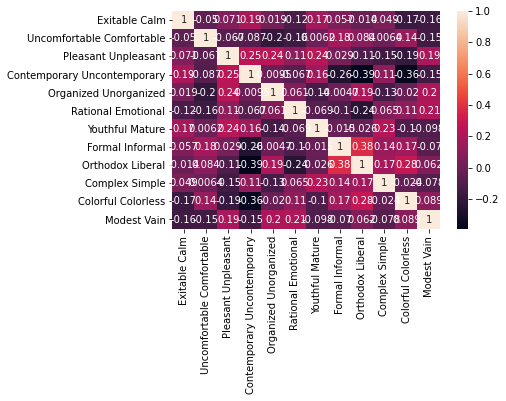

In [157]:
sn.heatmap(correlation_matrix, annot=True)
plt.show()

In [158]:
# Split data in train and test set
train, test = train_test_split(df_train, test_size=0.3,random_state=42)

In [159]:
train.head()

,Exitable Calm,Uncomfortable Comfortable,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13239676771,0.666667,0.714286,0.142857,0.428571,0.000000,0.285714,0.714286,0.857143,0.714286,0.714286,0.428571,0.166667
13238462788,0.666667,0.714286,0.428571,0.142857,0.285714,0.285714,0.714286,0.714286,1.000000,0.571429,0.714286,0.333333
13238184908,0.333333,0.428571,1.000000,0.428571,1.000000,0.571429,0.714286,0.714286,0.714286,0.285714,0.571429,0.833333
13240463751,0.833333,1.000000,0.285714,0.571429,0.428571,0.571429,0.571429,0.428571,0.857143,0.285714,0.571429,0.500000
13249117061,1.000000,0.428571,0.428571,0.714286,0.714286,0.714286,0.714286,0.428571,0.428571,0.714286,0.428571,0.833333


In [160]:
# Define knn model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)

model_knn.fit(train)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

### Evaluation

In [161]:
test.head()

,Exitable Calm,Uncomfortable Comfortable,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13244840492,0.333333,1.000000,0.142857,0.285714,0.285714,0.428571,0.428571,0.714286,0.571429,0.285714,0.857143,0.500000
13237381960,1.000000,1.000000,0.000000,0.000000,0.857143,0.000000,0.571429,0.857143,1.000000,0.571429,0.714286,0.333333
13239806794,0.500000,0.428571,0.000000,0.142857,0.428571,0.714286,0.285714,0.285714,0.285714,0.142857,0.571429,0.666667
13264663777,0.333333,0.428571,0.142857,0.714286,0.285714,0.571429,0.714286,0.428571,0.285714,0.571429,0.571429,0.333333
13240917054,0.333333,0.714286,0.285714,0.142857,0.142857,0.714286,0.857143,0.428571,0.428571,0.428571,0.285714,0.833333


In [162]:
##### Voorbeeld hoe het werkt bij 1 persoon 
person1 = test.iloc[1,:].values.reshape(1,-1)

In [163]:
n_neighors = 3
n_recommendations = 5
# get predicted values
style_neighbors = model_knn.kneighbors(person1, n_neighors, return_distance=True)

In [164]:
# The 3 distances, followed up with 3 same users
style_neighbors

(array([[0.07453227, 0.08633694, 0.09065245]]), array([[ 1,  8, 42]]))

In [165]:
# The 3 neighbors
style_neighbors[1]

array([[ 1,  8, 42]])

In [166]:
[respondenten[nb] for nb in style_neighbors[1][0]]

[13263750995, 13240463751, 13237386087]

In [167]:
like_matrix = pd.read_csv('style_like_scores_matrix.csv', index_col = 'Unnamed: 0')

In [168]:
like_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
13264663777,-0.666667,0.0,-0.142857,0.142857,0.035714,0.043478,-0.142857,-0.2,0.024390,0.0,...,0.0,0.035714,0.0,0.25,0.0,-1.0,-0.2,-0.181818,0.428571,0.111111
13263750995,-0.666667,0.0,-0.142857,-0.428571,-0.035714,-0.043478,-0.142857,-0.1,-0.024390,0.0,...,0.0,0.107143,0.0,0.00,0.0,-1.0,-0.2,0.000000,0.142857,0.111111
13263613156,0.000000,0.0,0.142857,-0.714286,0.107143,-0.130435,-0.142857,0.1,0.121951,0.0,...,0.0,0.250000,0.0,0.25,0.0,1.0,-0.2,0.000000,-0.428571,-0.333333
13249068738,-0.666667,0.0,-0.142857,-0.714286,-0.214286,-0.304348,-0.142857,-0.2,-0.268293,0.0,...,0.0,-0.321429,0.0,-0.25,0.0,-1.0,-0.2,-0.181818,-0.428571,-0.333333
13244840492,0.666667,0.0,0.142857,0.142857,0.000000,0.130435,-0.142857,0.0,0.073171,0.0,...,0.0,0.178571,0.0,-0.25,0.0,1.0,0.2,0.000000,0.142857,0.333333


In [169]:
# De score van the neighbors voor 25 genres
resp = [respondenten[nb] for nb in style_neighbors[1][0]]

like_matrix[like_matrix.index.isin(resp)]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
13263750995,-0.666667,0.0,-0.142857,-0.428571,-0.035714,-0.043478,-0.142857,-0.1,-0.024390,0.0,...,0.0,0.107143,0.0,0.000,0.0,-1.0,-0.2,0.000000,0.142857,0.111111
13240463751,0.000000,0.0,0.142857,0.714286,0.035714,0.217391,0.142857,0.1,0.073171,0.0,...,0.0,0.178571,0.0,-0.250,0.0,1.0,-0.2,0.000000,0.142857,0.111111
13237386087,0.000000,0.0,-0.571429,0.142857,-0.160714,0.043478,-0.142857,-0.1,-0.097561,-0.5,...,0.0,-0.178571,0.0,-0.125,-1.0,0.0,0.0,-0.090909,-0.285714,-0.222222


In [170]:
# De mean score van de 3 soort gelijke users, voor de 25 genres
avg_score_genres = like_matrix[like_matrix.index.isin(resp)].mean()

avg_score_genres

0    -0.222222
1     0.000000
2    -0.190476
3     0.142857
4    -0.053571
5     0.072464
6    -0.047619
7    -0.033333
8    -0.016260
9    -0.166667
10    0.000000
11   -0.333333
12    0.029412
13    0.074074
14   -0.083333
15    0.000000
16    0.035714
17    0.000000
18   -0.125000
19   -0.333333
20    0.000000
21   -0.133333
22   -0.030303
23    0.000000
24    0.000000
dtype: float64

In [171]:
def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: lst[i])
    return s

In [172]:
index_recommendations = sort_index(avg_score_genres)[:n_recommendations]
index_recommendations

[3, 13, 5, 16, 12]

In [173]:
style_id = pickle.load(open('style_indexes.p','rb'))

In [174]:
style_recommendations = [style_id[rec] for rec in index_recommendations]
style_recommendations

['Business', 'Form-fitting', 'Chic', 'Loose-fit', 'Feminine']

####  Recommendations voor de hele test set 

In [175]:
neighbors = model_knn.kneighbors(test, n_neighors, return_distance=True)

In [176]:
# Voor alle 25 personen in de test set, de 3 neighbors
neighbors = neighbors[1]
neighbors

array([[27, 41, 34],
       [ 1,  8, 42],
       [47, 15, 11],
       [23, 28, 25],
       [16, 31, 25],
       [35, 13, 45],
       [32,  7, 41],
       [41, 52, 45],
       [52, 41, 16],
       [24, 27, 18],
       [10, 52, 41],
       [33,  3, 41],
       [30, 48, 12],
       [37, 45, 17],
       [ 1, 45, 17],
       [50,  1, 42],
       [15,  9, 16],
       [37, 27, 34],
       [52,  1, 41],
       [19, 27, 20],
       [13,  3, 41],
       [41, 13, 30],
       [37,  0, 45],
       [45, 20, 48]])

In [177]:
neighbors = [[respondenten[nb] for nb in list_of_nb] for list_of_nb in neighbors]
neighbors

[[13264685797, 13237381960, 13238590958],
 [13263750995, 13240463751, 13237386087],
 [13263584801, 13239741363, 13239966016],
 [13237855975, 13263637869, 13237380689],
 [13239746222, 13245211614, 13237380689],
 [13238520834, 13239806794, 13237319909],
 [13243254947, 13240718620, 13237381960],
 [13237381960, 13239673038, 13237319909],
 [13239673038, 13237381960, 13239746222],
 [13237402846, 13264685797, 13238520630],
 [13240301382, 13239673038, 13237381960],
 [13240050877, 13249068738, 13237381960],
 [13246534584, 13249047153, 13239867945],
 [13238184908, 13237319909, 13239743538],
 [13263750995, 13237319909, 13239743538],
 [13242105575, 13263750995, 13237386087],
 [13239741363, 13240304890, 13239746222],
 [13238184908, 13264685797, 13238590958],
 [13239673038, 13263750995, 13237381960],
 [13238479027, 13264685797, 13238452713],
 [13239806794, 13249068738, 13237381960],
 [13237381960, 13239806794, 13246534584],
 [13238184908, 13264663777, 13237319909],
 [13237319909, 13238452713, 132490

In [178]:
# Voeg alle stappen zoals samen zoals bij 1 persoon, maar nu voor iedere persoon
# alle recommendations voor de test set
recommendations_test = [sort_index(like_matrix[like_matrix.index.isin(nb)].mean())[:n_recommendations] for nb in neighbors]
recommendations_test

[[21, 12, 5, 13, 24],
 [3, 13, 5, 16, 12],
 [17, 21, 24, 23, 5],
 [10, 15, 17, 21, 12],
 [10, 15, 17, 1, 7],
 [19, 20, 21, 1, 13],
 [20, 21, 1, 12, 13],
 [21, 3, 0, 9, 15],
 [15, 21, 12, 13, 22],
 [24, 21, 12, 8, 1],
 [15, 21, 12, 13, 22],
 [21, 12, 24, 1, 10],
 [1, 6, 12, 15, 21],
 [21, 6, 9, 10, 15],
 [19, 9, 1, 10, 15],
 [13, 15, 12, 23, 5],
 [1, 9, 10, 11, 15],
 [13, 3, 21, 12, 5],
 [23, 12, 15, 21, 24],
 [0, 21, 8, 12, 18],
 [21, 12, 1, 10, 15],
 [20, 21, 24, 12, 13],
 [3, 18, 21, 8, 24],
 [19, 0, 9, 21, 18]]

In [179]:
i = 0
for recommendation in recommendations_test:
    print("User: " + str(test.index[i]) + " heeft aanbevelingen:")
    print([style_id[rec] for rec in recommendation])
    i += 1


User: 13244840492 heeft aanbevelingen:
['Party', 'Feminine', 'Chic', 'Form-fitting', 'Sexy']
User: 13237381960 heeft aanbevelingen:
['Business', 'Form-fitting', 'Chic', 'Loose-fit', 'Feminine']
User: 13239806794 heeft aanbevelingen:
['Luxury', 'Party', 'Sexy', 'Romantic', 'Chic']
User: 13264663777 heeft aanbevelingen:
['Designer', 'Goth', 'Luxury', 'Party', 'Feminine']
User: 13240917054 heeft aanbevelingen:
['Designer', 'Goth', 'Luxury', 'Bohemian', 'Colorful']
User: 13239152356 heeft aanbevelingen:
['Modest', 'Monochrome', 'Party', 'Bohemian', 'Form-fitting']
User: 13237754403 heeft aanbevelingen:
['Monochrome', 'Party', 'Bohemian', 'Feminine', 'Form-fitting']
User: 13238620869 heeft aanbevelingen:
['Party', 'Business', 'Active', 'Contemporary', 'Goth']
User: 13238642415 heeft aanbevelingen:
['Goth', 'Party', 'Feminine', 'Form-fitting', 'Playful']
User: 13238590958 heeft aanbevelingen:
['Sexy', 'Party', 'Feminine', 'Comfortable', 'Bohemian']
User: 13237797264 heeft aanbevelingen:
['Go

In [180]:
styles_test = like_matrix[like_matrix.index.isin(test.index)]

In [181]:
# Get 3 actual most popular genres
y_test = styles_test.apply(lambda x: pd.Series(x.nlargest(5).index), axis=1)
y_test = y_test.values.tolist()

In [182]:
# Flatten nested list to evaluate
y_pred = [val for sublist in recommendations_test for val in sublist]
y_test = [val for sublist in y_test for val in sublist]

In [183]:
y_test = [int(y) for y in y_test]

In [184]:
metrics.f1_score(y_test,y_pred,average = 'macro')

0.03681210945916828